In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.style.use('ggplot')


In [2]:
df = pd.read_csv(r"C:\Users\hetbr\Downloads\train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()
df.isnull().sum()
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [4]:
df['Sex'].value_counts()
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
# Fill missing values
df.loc[:, 'Age'] = df['Age'].fillna(df['Age'].median())
df.loc[:, 'Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column if it exists
df.drop('Cabin', axis=1, inplace=True, errors='ignore')


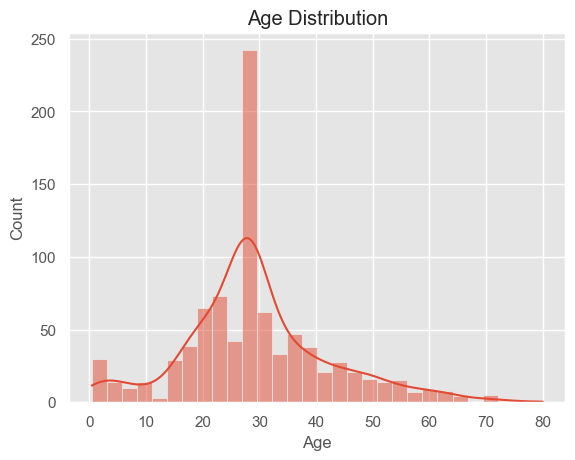

In [11]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

#Observation:
#The age distribution is right-skewed, with a higher number of younger passengers.
#A noticeable peak occurs around ages 20–30, indicating many passengers were young adults.
#Fewer elderly passengers were on board.

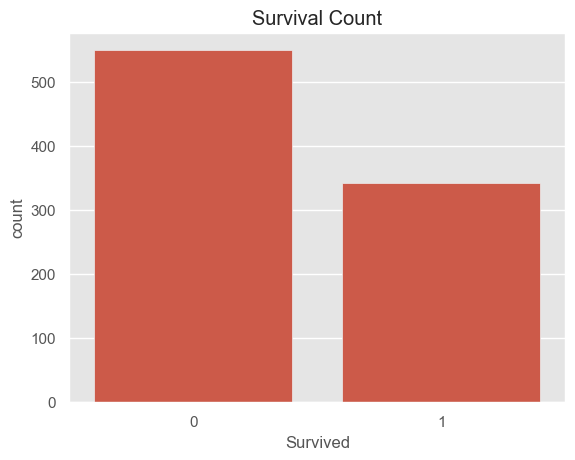

In [12]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

#Observation:
#More passengers did not survive (0) than those who did (1).
#The dataset is imbalanced with higher fatalities.

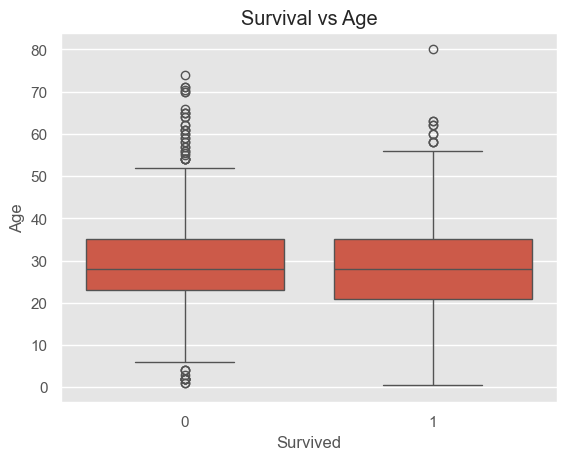

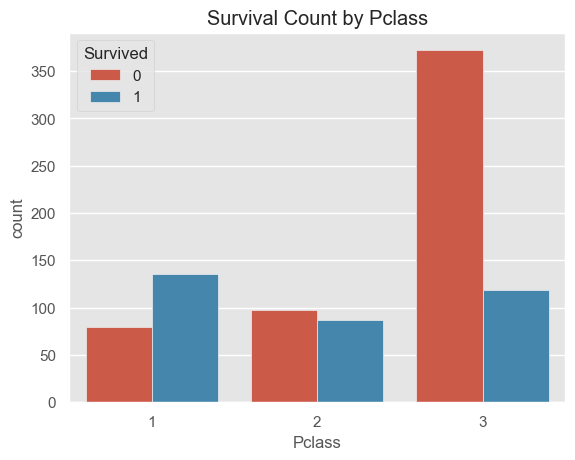

In [14]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Survival vs Age')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Pclass')
plt.show()


#Observation:
#Survivors tend to be younger on average.
#Median age of survivors is slightly lower than that of non-survivors.
#There is a wider age range among non-survivors.

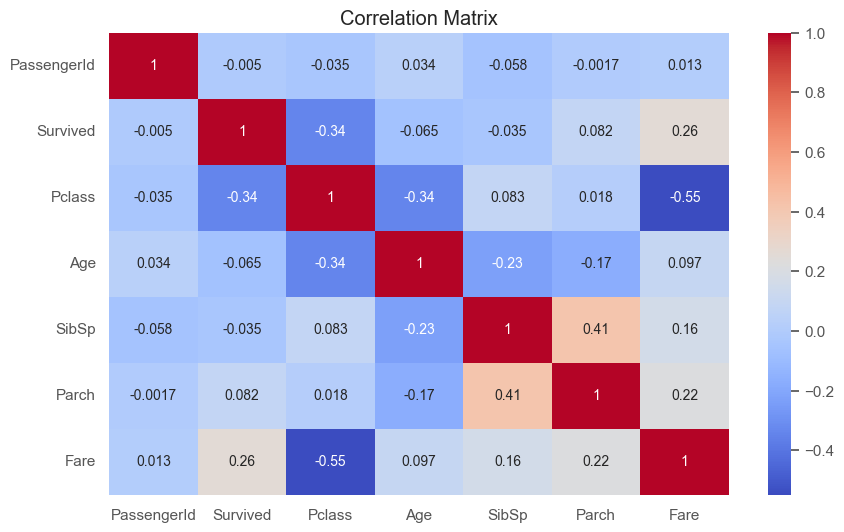

In [16]:
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=['number'])  # Only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#Observation:
#Fare and Pclass are negatively correlated (higher fare, lower class number = better class).
#Survived shows moderate correlation with Fare and weak positive correlation with Parch and SibSp.
#Age has very low correlation with survival.

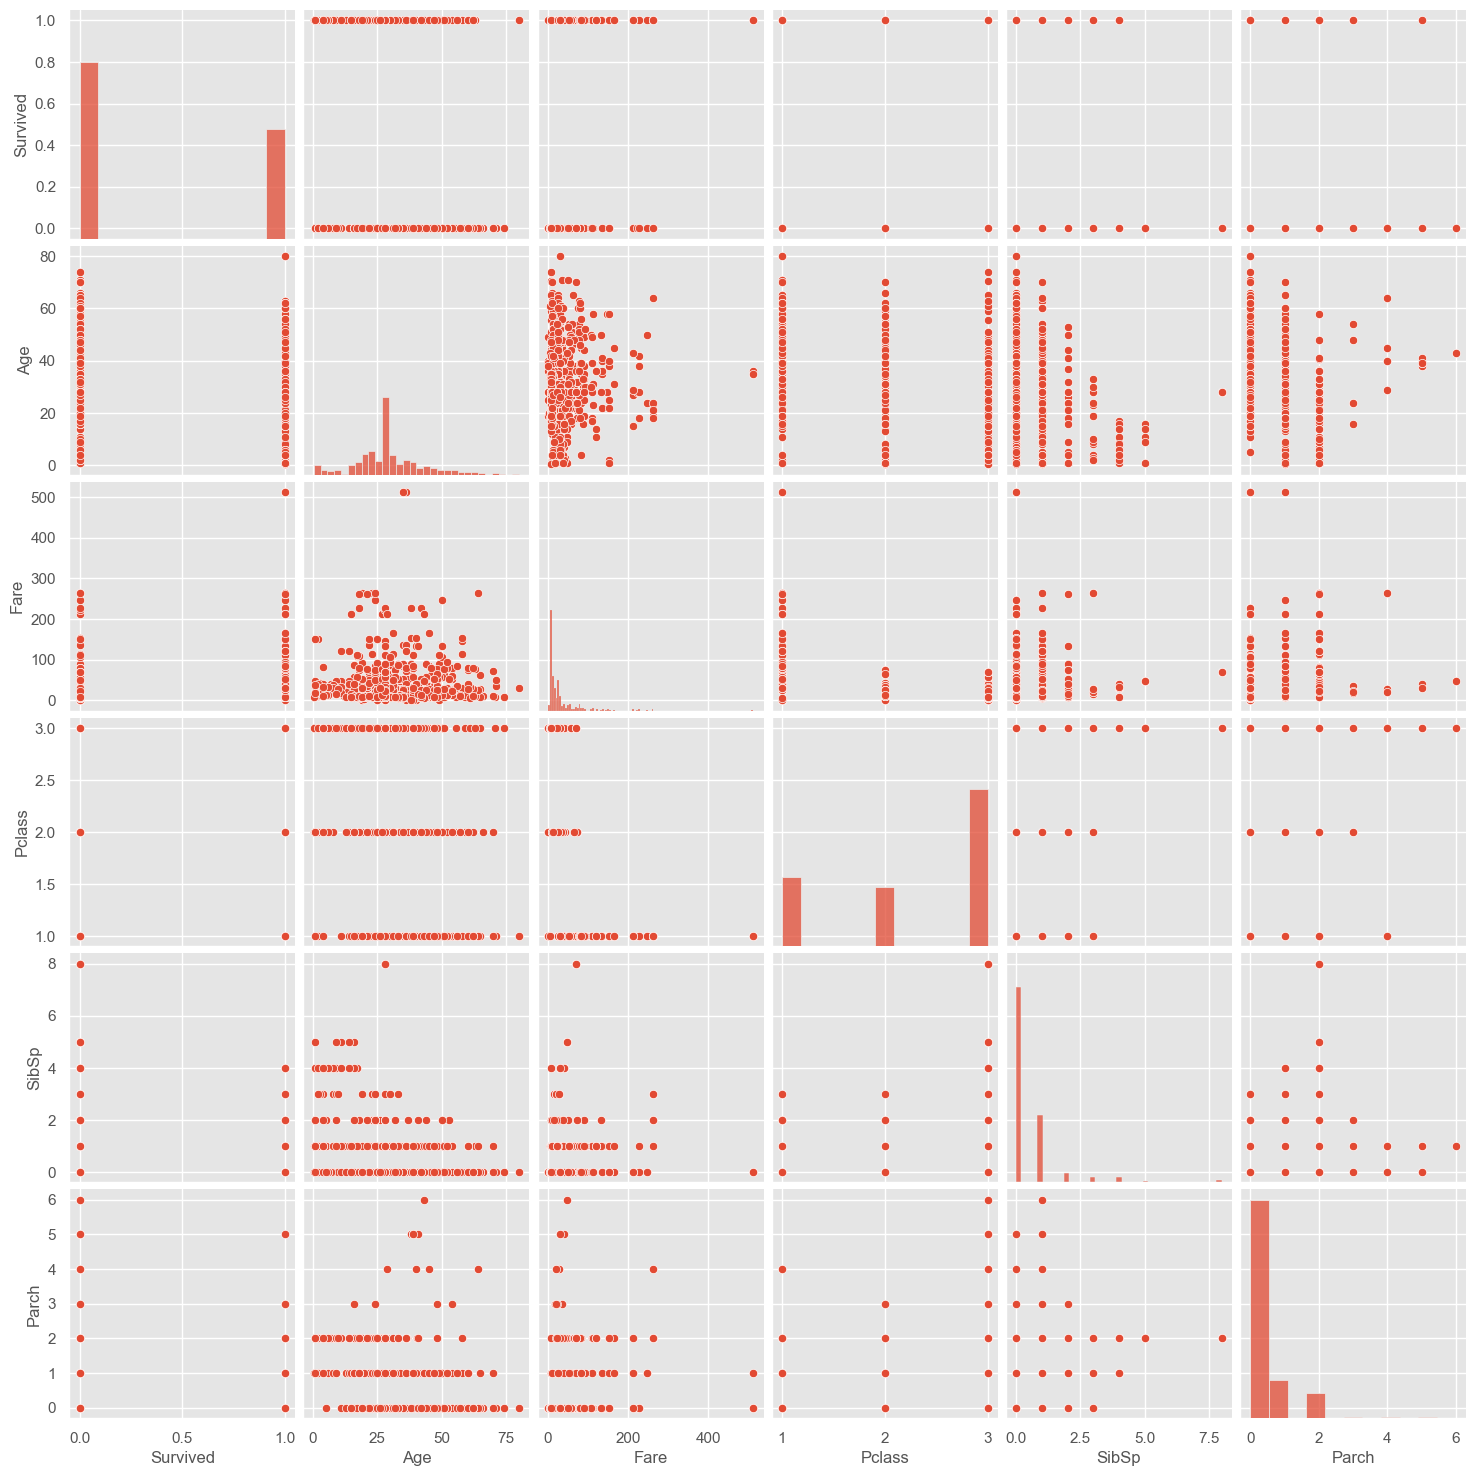

In [17]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'SibSp', 'Parch']])
plt.show()


#Observation:
#1st class passengers had a significantly higher survival rate.
#Survival decreased with lower class: 3rd class passengers had the highest number of deaths.
#Socioeconomic status had a strong impact on survival chances.

In [ ]:
## 🔍 Summary of Findings – Titanic Dataset

1. Survival Imbalance  
   - The dataset shows a higher number of fatalities than survivors.  
   - Survival rate is less than 40%, indicating the disaster’s severity.

2. Age Influence 
   - Most passengers were young adults (20–30 years).  
   - Younger passengers had a slightly higher chance of survival.

3. Passenger Class Impact  
   - 1st class passengers had the highest survival rate.  
   - Survival decreased with lower class; 3rd class suffered the most casualties.

4. Fare Correlation 
   - Passengers who paid higher fares were more likely to survive.  
   - Fare is inversely related to class, reinforcing the socio-economic influence on survival.

5. Family Presence  
   - Mild positive correlation between survival and the number of siblings/spouses (`SibSp`) and **parents/children (`Parch`) on board.  
   - Passengers with family aboard may have had better survival odds.
